In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
S=107
nu=0.06
sigma=0.15
T=5
L=[]
N=100#Nombre iteration
M=500 #Nombre scenario
t=T/M


In [3]:
L=[S for i in range(0,M)]

In [4]:
D = {'scenario' + str(i): [S] + [np.nan] * N for i in range(M)}
df=pd.DataFrame(D)


In [5]:
def tranform(col):
    shocks = np.random.standard_normal(len(col)) * np.sqrt(t)
    # print(shocks)
    for i in range(1,len(df)):
        col.iloc[i]=col.iloc[i-1]*(1+nu*t+sigma*shocks[i])
    return col
df.apply(tranform,axis=0)

,scenario0,scenario1,scenario2,scenario3,scenario4,scenario5,scenario6,scenario7,scenario8,scenario9,...,scenario490,scenario491,scenario492,scenario493,scenario494,scenario495,scenario496,scenario497,scenario498,scenario499
0,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
1,110.941945,108.052169,106.513332,108.281502,106.572755,106.318091,106.200464,106.183466,105.391478,108.145544,...,107.286998,105.644429,109.234664,105.236628,106.391953,103.762014,106.158582,107.064091,106.834146,106.423791
2,110.983572,107.993117,104.150746,109.944242,106.658287,105.458717,104.275022,105.948073,106.333153,108.608300,...,106.094971,106.014614,109.683342,104.302951,106.996463,106.804632,104.834735,106.117712,105.049960,103.584542
3,108.340197,108.371264,102.133677,110.476446,106.715033,107.182558,103.892802,109.372050,105.494424,106.493225,...,105.032599,106.190809,110.541343,102.453725,107.528135,104.617420,103.185841,105.033102,109.132921,106.739561
4,108.608726,110.011137,102.175785,109.425762,106.689244,109.628232,106.573722,109.923264,104.920977,109.277847,...,107.285006,106.228321,110.727307,103.269786,106.131950,106.841552,100.494752,106.062787,109.589977,103.756591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,144.866733,107.433916,98.121173,106.150957,82.965771,96.919470,101.981376,117.747828,129.958268,93.924858,...,104.138747,112.987728,95.493943,77.404018,107.423035,111.940565,86.043806,128.594690,129.123950,167.199113
97,143.844750,107.884291,100.576402,103.320225,83.219871,95.660079,103.338521,115.503747,128.345446,93.427808,...,104.684639,108.125003,94.153508,77.302460,107.434439,107.887723,85.426998,125.404556,129.707938,170.518380
98,139.636746,109.465068,99.246640,105.559834,81.494621,94.056476,103.854088,117.452774,127.300418,93.582392,...,104.236879,105.894637,92.243930,77.995452,107.838663,106.220938,85.701339,123.042497,130.544947,166.827413
99,138.726316,111.352864,100.747866,107.691983,83.656168,93.171304,107.015449,117.618209,127.961480,92.144129,...,104.190376,107.327176,91.624693,79.203121,107.305357,106.312777,84.774942,125.109268,130.656323,165.478377


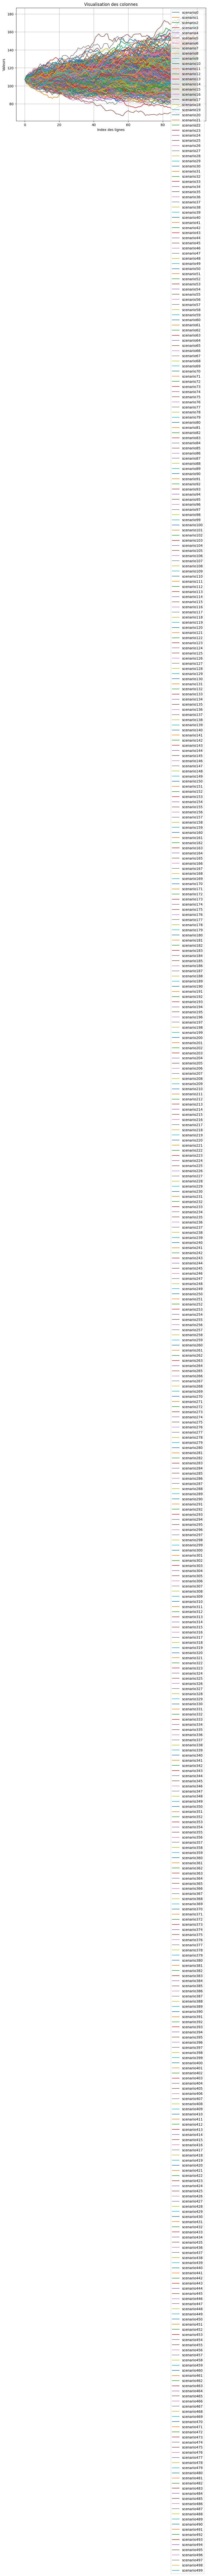

In [6]:
plt.figure(figsize=(10, 6))  # Taille du graphe

for column in df.columns:
    plt.plot(df.index, df[column], label=column)  # df.index = valeurs X

plt.title("Visualisation des colonnes")
plt.xlabel("Index des lignes")
plt.ylabel("Valeurs")
plt.legend()  # Affiche la légende
plt.grid(True)
plt.show()

In [7]:
SPOT=df.iloc[-1]
K=100
r=0.02
SpotMinK=SPOT-K
KMinSpot=K-SPOT
Pc = np.where(SpotMinK > 0, SpotMinK, 0)
Pp= np.where(KMinSpot > 0, KMinSpot, 0)
d=float(np.exp(-r*T))
PriceCall=np.mean(Pc*d)
PricePUT=np.mean(Pp*d)
PriceForward=np.mean(SPOT)
print("le nombre de scenario est "+str(M))
print("le prix du CALL est "+str(PriceCall))
print("le prix du PUT est "+str(PricePUT))
print("le prix du Forward est "+str(PriceForward))


le nombre de scenario est 500
le prix du CALL est 14.335113450490313
le prix du PUT est 1.5887044064775155
le prix du Forward est 114.08696058533936
